In [52]:
import pandas as pd
df = pd.read_csv('creditcard.csv')
df['Time_hours'] = df['Time'] / 3600
freq_per_hour = df.groupby('Time_hours')['Time_hours'].transform('size')  # Updated to Time_hours
df['Freq_per_hour'] = freq_per_hour
print(df[['Time_hours', 'Time','Freq_per_hour']].head())
# Note: Using transform('size') applies the hourly transaction count to each row,
# eliminating the need for join, which struggled with duplicate Time_hours indices.

   Time_hours  Time  Freq_per_hour
0    0.000000   0.0              2
1    0.000000   0.0              2
2    0.000278   1.0              2
3    0.000278   1.0              2
4    0.000556   2.0              2


In [53]:
import pandas as pd
df = pd.read_csv('creditcard.csv')
df['Time_hours'] = df['Time'] / 3600
freq_per_hour = df.groupby('Time_hours').size().reset_index(name='Freq_per_hour')
print(freq_per_hour.head())

# This code converts Time to hours and uses groupby().size().reset_index() to create
# a table with one row per hour, showing the total transaction count (Freq_per_hour) for each.


   Time_hours  Freq_per_hour
0    0.000000              2
1    0.000278              2
2    0.000556              2
3    0.001111              1
4    0.001944              2


In [56]:
# Comment: This code converts Time to hours and uses groupby().mean().reset_index() to create
# a table with one row per hour, showing the average transaction amount (Avg_amount_per_hour).

import pandas as pd
df = pd.read_csv('creditcard.csv')
df['Time_hours'] = df['Time'] / 3600
avg_amount_per_hour = df.groupby('Time_hours')['Amount'].mean().reset_index(name = 'Avg_amount_per_hour')
print(avg_amount_per_hour.head())
    

   Time_hours  Avg_amount_per_hour
0    0.000000               76.155
1    0.000278              251.080
2    0.000556               36.830
3    0.001111                4.990
4    0.001944               67.000


In [ ]:
import pandas as pd
df = pd.read_csv('creditcard.csv')
df['Time_hours'] = df['Time'] / 3600
req_per_hour = df.groupby('Time_hours').size().reset_index(name = 'Freq_per_hour')
median_freq = freq_per_hour['Freq_per_hour'].median()
df.merge(freq_per_hour, on='Time_hours', how = 'left')
df['High_freq_hour'] = df['Freq_per_hour'] > median_freq
print(df[['Time_hours', 'Freq_per_hour', 'High_freq_hour']].head())
# Comment: This code converts Time to hours, calculates transaction frequency per hour,
# merges it back, and flags hours with above-median frequency as True in High_freq_hour.

In [61]:
import pandas as pd
df = pd.read_csv('creditcard.csv')
df['Time_hours'] = df['Time'] / 3600
freq_per_hour = df.groupby('Time_hours').size().reset_index(name='Freq_per_hour')
median_freq = freq_per_hour['Freq_per_hour'].median()
df = df.merge(freq_per_hour, on='Time_hours', how='left')
df['High_freq_hour'] = df['Freq_per_hour'] > median_freq
print(df[['Time_hours', 'Freq_per_hour', 'High_freq_hour']].head())



   Time_hours  Freq_per_hour  High_freq_hour
0    0.000000              2           False
1    0.000000              2           False
2    0.000278              2           False
3    0.000278              2           False
4    0.000556              2           False


In [68]:
import pandas as pd
df = pd.read_csv('creditcard.csv')
df['Time_hours'] = df['Time'] / 3600
freq_per_hour = df.groupby('Time_hours').size().reset_index(name='Freq_per_hour')
median_freq = freq_per_hour['Freq_per_hour'].median()
df = df.merge(freq_per_hour, on='Time_hours', how='left')
df['High_freq_hour'] = df['Freq_per_hour'] > median_freq
print(df[['Time_hours', 'Freq_per_hour', 'High_freq_hour']].head(50))
# Comment: This code converts Time to hours, calculates transaction frequency per hour,
# merges it back, and flags hours with above-median frequency as True in High_freq_hour.
# Reason: Median is used instead of mean to avoid skewing by outliers (e.g., busy hours),
# providing a more balanced threshold for high-frequency hours.

'''Outliers skew the mean
, raising the High_freq_hour threshold and flagging fewer hours. 
Median, ignores outliers for a balanced cutoff in imbalanced data.'''

    Time_hours  Freq_per_hour  High_freq_hour
0     0.000000              2           False
1     0.000000              2           False
2     0.000278              2           False
3     0.000278              2           False
4     0.000556              2           False
5     0.000556              2           False
6     0.001111              1           False
7     0.001944              2           False
8     0.001944              2           False
9     0.002500              1           False
10    0.002778              3            True
11    0.002778              3            True
12    0.002778              3            True
13    0.003056              1           False
14    0.003333              3            True
15    0.003333              3            True
16    0.003333              3            True
17    0.003611              1           False
18    0.003889              1           False
19    0.004167              1           False
20    0.004444              1     

'Outliers skew the mean\n, raising the High_freq_hour threshold and flagging fewer hours. \nMedian, ignores outliers for a balanced cutoff in imbalanced data.'

In [69]:
df['High_freq_hour'].describe()

count     284807
unique         2
top         True
freq      169846
Name: High_freq_hour, dtype: object

In [70]:
df['Freq_per_hour'].describe()

count    284807.000000
mean          3.129983
std           1.770255
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          36.000000
Name: Freq_per_hour, dtype: float64

In [71]:
df['Freq_per_hour'].median()

np.float64(3.0)

In [73]:
import pandas as pd
df = pd.read_csv('creditcard.csv')
df['Time_hours'] = df['Time'] / 3600
freq_per_hour = df.groupby('Time_hours').size().reset_index(name='Freq_per_hour')
median_freq = freq_per_hour['Freq_per_hour'].median()
df = df.merge(freq_per_hour, on='Time_hours', how= 'left')
df['High_freq_hour'] = df['Freq_per_hour'] > median_freq
amount_75th = df['Amount'].quantile(0.75) # 75th percentile
df['High_amount'] = df['Amount'] > amount_75th
print(df[['Time_hours', 'Amount', 'High_amount']].head())
# Comment: This code converts Time to hours, calculates transaction frequency per hour,
# merges it back, flags high-frequency hours (> median), and flags high-amount transactions
# (> 75th percentile) as True in High_amount.
# Reason: Median avoids outlier skew for frequency; 75th percentile targets upper amount range.
# Date: 12:07 PM CDT, 07/08/2025

   Time_hours  Amount  High_amount
0    0.000000  149.62         True
1    0.000000    2.69        False
2    0.000278  378.66         True
3    0.000278  123.50         True
4    0.000556   69.99        False


In [75]:
amount_75th

np.float64(77.16499999999999)

In [77]:
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [80]:
df['Amount'].median()

np.float64(22.0)

In [78]:
import pandas as pd
df = pd.read_csv('creditcard.csv')
df['Time_hours'] = df['Time'] / 3600
freq_per_hour = df.groupby('Time_hours').size().reset_index(name='Freq_per_hour')
median_freq = freq_per_hour['Freq_per_hour'].median()
df = df.merge(freq_per_hour, on='Time_hours', how='left')
df['High_freq_hour'] = df['Freq_per_hour'] > median_freq
amount_75th = df['Amount'].quantile(0.75)  # 75th percentile
df['High_amount'] = df['Amount'] > amount_75th
print(df[['Time_hours', 'Amount', 'High_amount']].head())
# Comment: This code converts Time to hours, calculates transaction frequency per hour,
# merges it back, flags high-frequency hours (> median), and flags high-amount transactions
# (> 75th percentile) as True in High_amount.
# Reason: Median avoids outlier skew for frequency; 75th percentile targets upper amount range.
# Date: 12:07 PM CDT, 07/08/2025

   Time_hours  Amount  High_amount
0    0.000000  149.62         True
1    0.000000    2.69        False
2    0.000278  378.66         True
3    0.000278  123.50         True
4    0.000556   69.99        False


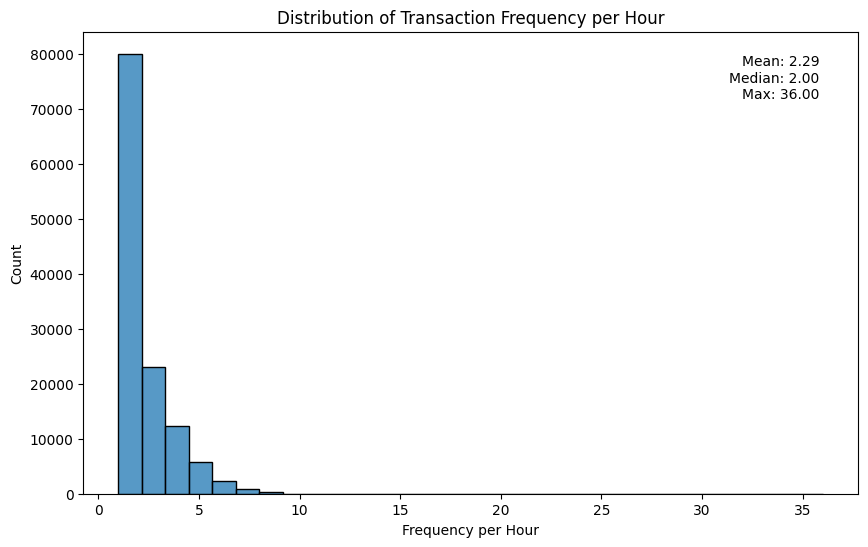

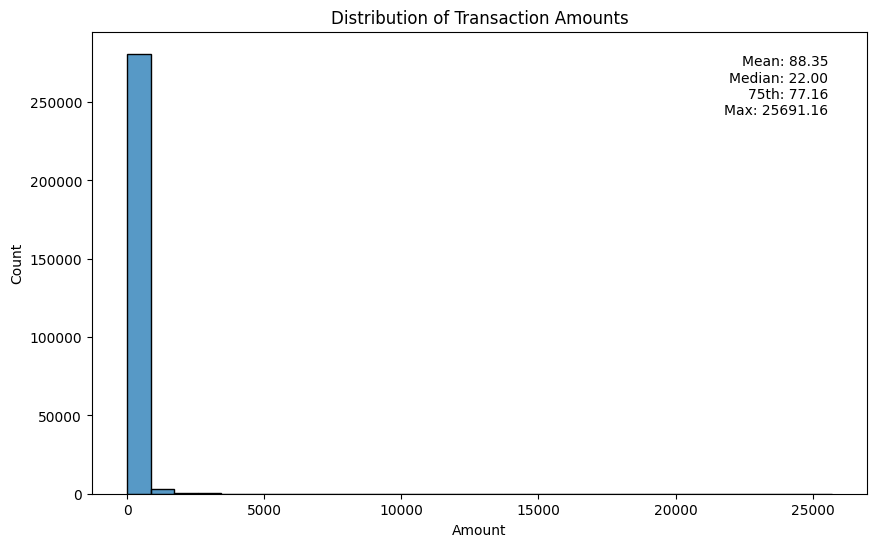

Records > 77: 71266, Records > 88: 64496
   Time_hours  Amount  High_amount
0    0.000000  149.62         True
1    0.000000    2.69        False
2    0.000278  378.66         True
3    0.000278  123.50         True
4    0.000556   69.99        False


In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('creditcard.csv')
df['Time_hours'] = df['Time'] / 3600
freq_per_hour = df.groupby('Time_hours').size().reset_index(name='Freq_per_hour')
median_freq = freq_per_hour['Freq_per_hour'].median()
df = df.merge(freq_per_hour, on='Time_hours', how='left')
df['High_freq_hour'] = df['Freq_per_hour'] > median_freq
amount_75th = df['Amount'].quantile(0.75)
df['High_amount'] = df['Amount'] > amount_75th
# Frequency distribution
plt.figure(figsize=(10, 6))
sns.histplot(freq_per_hour['Freq_per_hour'], bins=30)
plt.title('Distribution of Transaction Frequency per Hour')
plt.xlabel('Frequency per Hour')
plt.ylabel('Count')
#plt.text(0.95, 0.95, f'Mean: {freq_per_hour["Freq_per_hour"].mean():.2f}\nMedian: {median_freq:.2f}\nMax: {freq_per_hour["Freq_per_hour"].max():.2f}',
       # transform=plt.gca().transAxes, ha='right', va='top')

plt.text(0.95, 0.95, f'Mean: {freq_per_hour["Freq_per_hour"].mean():.2f}\nMedian: {freq_per_hour["Freq_per_hour"].median():.2f}\nMax: {freq_per_hour["Freq_per_hour"].max():.2f}',
        transform=plt.gca().transAxes, ha='right', va='top')

plt.show()
# Amount distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=30)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.text(0.95, 0.95, f'Mean: {df["Amount"].mean():.2f}\nMedian: {df["Amount"].median():.2f}\n75th: {amount_75th:.2f}\nMax: {df["Amount"].max():.2f}',
        transform=plt.gca().transAxes, ha='right', va='top')
plt.show()
print(f"Records > 77: {len(df[df['Amount'] > 77])}, Records > 88: {len(df[df['Amount'] > 88])}")
print(df[['Time_hours', 'Amount', 'High_amount']].head())
# Comment: This code converts Time to hours, calculates transaction frequency per hour,
# merges it back, flags high-frequency hours (> median), and flags high-amount transactions
# (> 75th percentile) as True in High_amount.
# Reason: Median avoids outlier skew for frequency; 75th percentile (~77) targets upper amount range,
# avoiding over-flagging with mean (88) despite more records > 88 due to skewness.
# Date: 03:04 PM CDT, 07/08/2025

In [81]:
freq_per_hour['Freq_per_hour'].max()

np.int64(36)

In [86]:
print(freq_per_hour.describe())

          Time_hours  Freq_per_hour
count  124592.000000  124592.000000
mean       25.659898       2.285917
std        13.525027       1.389057
min         0.000000       1.000000
25%        14.206875       1.000000
50%        23.920556       2.000000
75%        38.060417       3.000000
max        47.997778      36.000000


In [85]:
df['Freq_per_hour'].describe()

count    284807.000000
mean          3.129983
std           1.770255
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          36.000000
Name: Freq_per_hour, dtype: float64

In [91]:
df['Freq_per_hour'].head(10)

0    2
1    2
2    2
3    2
4    2
5    2
6    1
7    2
8    2
9    1
Name: Freq_per_hour, dtype: int64

In [88]:
freq_per_hour.head(10)

,Time_hours,Freq_per_hour
0,0.000000,2
1,0.000278,2
2,0.000556,2
3,0.001111,1
4,0.001944,2
5,0.002500,1
6,0.002778,3
7,0.003056,1
8,0.003333,3
9,0.003611,1


In [92]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V25,V26,V27,V28,Amount,Class,Time_hours,Freq_per_hour,High_freq_hour,High_amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.000000,2,False,True
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.000000,2,False,False
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.000278,2,False,True
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.000278,2,False,True
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.000556,2,False,False


In [94]:
print(df[['Time_hours', 'Freq_per_hour', 'High_freq_hour']])

        Time_hours  Freq_per_hour  High_freq_hour
0         0.000000              2           False
1         0.000000              2           False
2         0.000278              2           False
3         0.000278              2           False
4         0.000556              2           False
...            ...            ...             ...
284802   47.996111              1           False
284803   47.996389              1           False
284804   47.996667              2           False
284805   47.996667              2           False
284806   47.997778              1           False

[284807 rows x 3 columns]


In [95]:
freq_per_hour.describe()

,Time_hours,Freq_per_hour
count,124592.000000,124592.000000
mean,25.659898,2.285917
std,13.525027,1.389057
min,0.000000,1.000000
25%,14.206875,1.000000
50%,23.920556,2.000000
75%,38.060417,3.000000
max,47.997778,36.000000


In [111]:
# Comment: This code flags transactions between 22:00 and 06:00 as high-risk time periods.
df['High_risk_time'] = (df['Time_hours'] >= 22) | (df['Time_hours'] < 6)
print(df[['Time_hours', 'High_risk_time']].head())

   Time_hours  High_risk_time
0    0.000000            True
1    0.000000            True
2    0.000278            True
3    0.000278            True
4    0.000556            True


In [117]:
df['Risk_score'] = (df['High_freq_hour'].astype(int) + df['High_amount'].astype(int) + df['High_risk_time'].astype(int))
print(df[['Time_hours', 'High_freq_hour', 'High_amount', 'High_risk_time', 'Risk_score']].head())
# Comment: This code creates a risk score (0-3) by summing binary flags for high frequency,
# high amount, and high-risk time periods. 0: no risk, 3: all risks. Each flag a risk factor.
'''astype(int) converts True/False)  to integers (1 for True, 0 for False) : summed to Risk_score.'''

   Time_hours  High_freq_hour  High_amount  High_risk_time  Risk_score
0    0.000000           False         True            True           2
1    0.000000           False        False            True           1
2    0.000278           False         True            True           2
3    0.000278           False         True            True           2
4    0.000556           False        False            True           1


'astype(int) converts True/False)  to integers (1 for True, 0 for False) : summed to Risk_score.'

In [115]:
df['Risk_score'] = (df['High_freq_hour'].astype(int) + df['High_amount'].astype(int) + df['High_risk_time'].astype(int))
print(df[['Time_hours', 'High_freq_hour', 'High_amount', 'High_risk_time', 'Risk_score']].head())

   Time_hours  High_freq_hour  High_amount  High_risk_time  Risk_score
0    0.000000           False         True            True           2
1    0.000000           False        False            True           1
2    0.000278           False         True            True           2
3    0.000278           False         True            True           2
4    0.000556           False        False            True           1


In [ ]:
df['Risk_score'].describe()

In [107]:
df['Risk_score'].median()

np.float64(1.0)

<Axes: xlabel='Risk_score', ylabel='Count'>

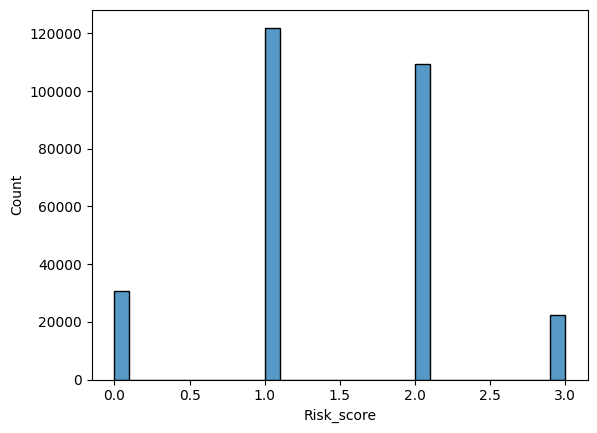

In [108]:
sns.histplot(df['Risk_score'], bins=30)

In [118]:
df['Risk_score'] = (df['High_freq_hour'].astype(int) + df['High_amount'].astype(int) + df['High_risk_time'].astype(int))
print(df[['Time_hours', 'High_freq_hour', 'High_amount', 'High_risk_time', 'Risk_score']].head())
# Comment: This code creates a risk score (0-3) by summing binary flags for high frequency,
# high amount, and high-risk time periods.

   Time_hours  High_freq_hour  High_amount  High_risk_time  Risk_score
0    0.000000           False         True            True           2
1    0.000000           False        False            True           1
2    0.000278           False         True            True           2
3    0.000278           False         True            True           2
4    0.000556           False        False            True           1


In [119]:
print(df[df['Risk_score'] == 3][['Time_hours', 'High_freq_hour', 'High_amount', 'High_risk_time', 'Risk_score']])

        Time_hours  High_freq_hour  High_amount  High_risk_time  Risk_score
12        0.002778            True         True            True           3
51        0.010000            True         True            True           3
60        0.011389            True         True            True           3
61        0.011389            True         True            True           3
77        0.013611            True         True            True           3
...            ...             ...          ...             ...         ...
284716   47.974444            True         True            True           3
284719   47.975000            True         True            True           3
284724   47.975556            True         True            True           3
284757   47.984722            True         True            True           3
284771   47.988611            True         True            True           3

[22518 rows x 5 columns]


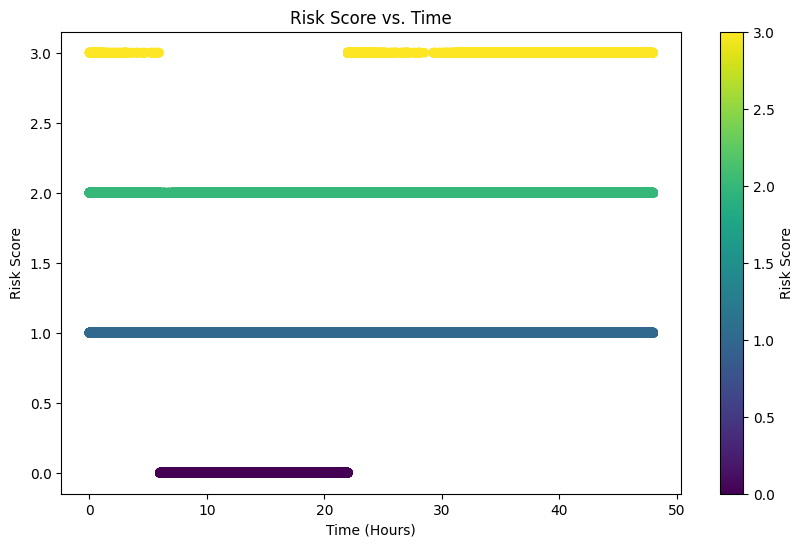

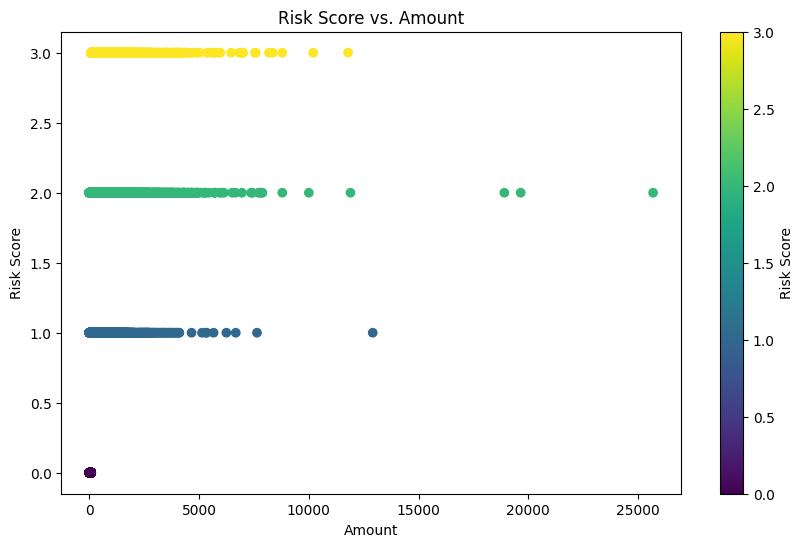

   Time_hours  Amount  Freq_per_hour  High_freq_hour  High_amount  \
0    0.000000  149.62              2           False         True   
1    0.000000    2.69              2           False        False   
2    0.000278  378.66              2           False         True   
3    0.000278  123.50              2           False         True   
4    0.000556   69.99              2           False        False   

   High_risk_time  Risk_score  
0            True           2  
1            True           1  
2            True           2  
3            True           2  
4            True           1  
0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64


In [122]:
X = df[['Time_hours', 'Amount', 'Freq_per_hour', 'High_freq_hour', 'High_amount', 'High_risk_time', 'Risk_score']]
y = df['Class']
# Plot Risk_score vs. Time_hours
plt.figure(figsize=(10, 6))
plt.scatter(df['Time_hours'], df['Risk_score'], c=df['Risk_score'], cmap='viridis')
plt.title('Risk Score vs. Time')
plt.xlabel('Time (Hours)')
plt.ylabel('Risk Score')
plt.colorbar(label='Risk Score')
plt.show()
# Plot Risk_score vs. Amount
plt.figure(figsize=(10, 6))
plt.scatter(df['Amount'], df['Risk_score'], c=df['Risk_score'], cmap='viridis')
plt.title('Risk Score vs. Amount')
plt.xlabel('Amount')
plt.ylabel('Risk Score')
plt.colorbar(label='Risk Score')
plt.show()
print(X.head())
print(y.head())
# Comment: This code selects features (Time_hours, Amount, etc.) into X and target (Class) into y for modeling,
# and plots Risk_score against Time_hours and Amount with color gradient.

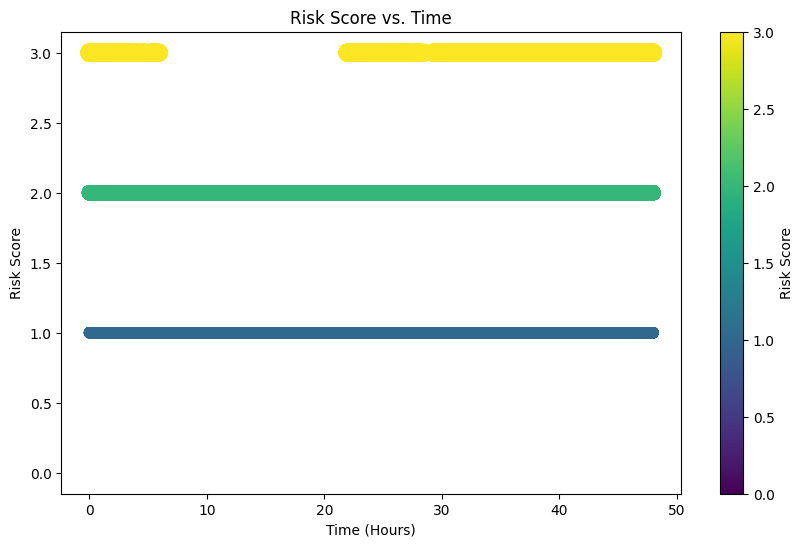

<module 'matplotlib.pyplot' from 'C:\\Users\\4837383\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages\\matplotlib\\pyplot.py'>

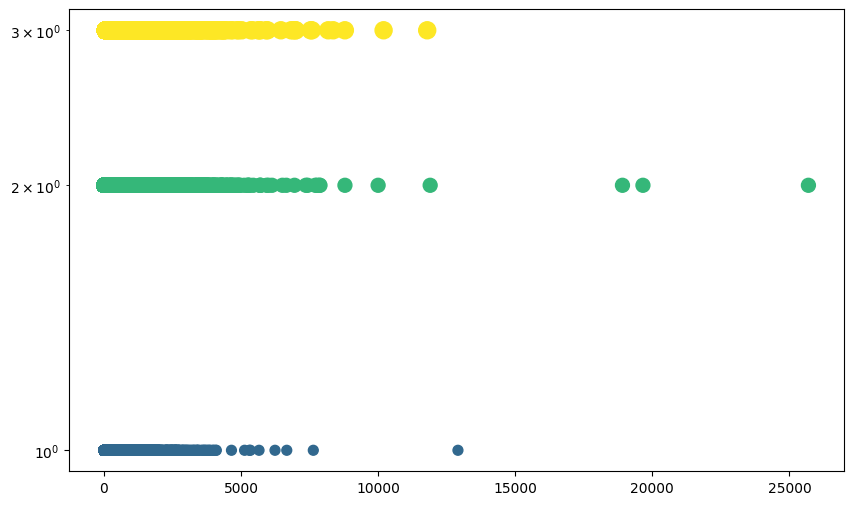

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('creditcard.csv')
df['Time_hours'] = df['Time'] / 3600
freq_per_hour = df.groupby('Time_hours').size().reset_index(name='Freq_per_hour')
median_freq = freq_per_hour['Freq_per_hour'].median()
df = df.merge(freq_per_hour, on='Time_hours', how='left')
df['High_freq_hour'] = df['Freq_per_hour'] > median_freq
amount_75th = df['Amount'].quantile(0.75)
df['High_amount'] = df['Amount'] > amount_75th
df['High_risk_time'] = (df['Time_hours'] >= 22) | (df['Time_hours'] < 6)
df['Risk_score'] = (df['High_freq_hour'].astype(int) + df['High_amount'].astype(int) + df['High_risk_time'].astype(int))
# Plot Risk_score vs. Time_hours
plt.figure(figsize=(10, 6))
plt.scatter(df['Time_hours'], df['Risk_score'], c=df['Risk_score'], s=df['Risk_score']*50, cmap='viridis')
plt.title('Risk Score vs. Time')
plt.xlabel('Time (Hours)')
plt.ylabel('Risk Score')
plt.colorbar(label='Risk Score')
plt.show()
# Plot Risk_score vs. Amount
plt.figure(figsize=(10, 6))
plt.scatter(df['Amount'], df['Risk_score'], c=df['Risk_score'], s=df['Risk_score']*50, cmap='viridis')
plt.yscale('log')
plt

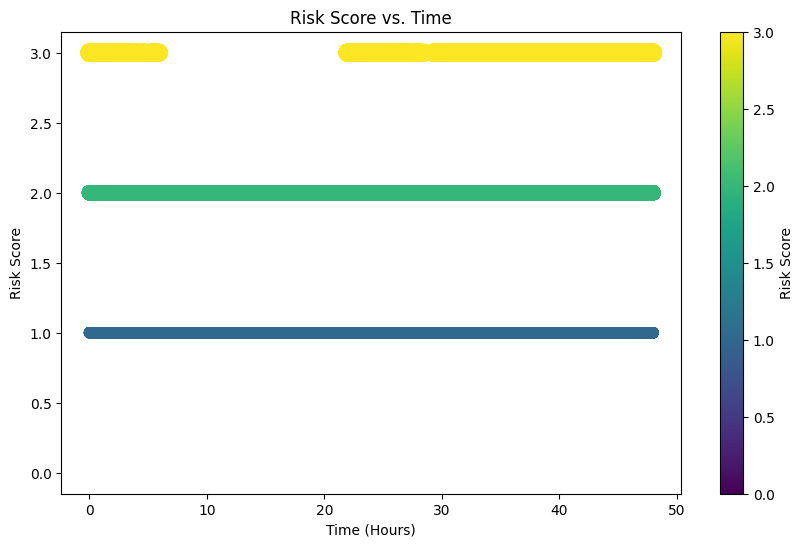

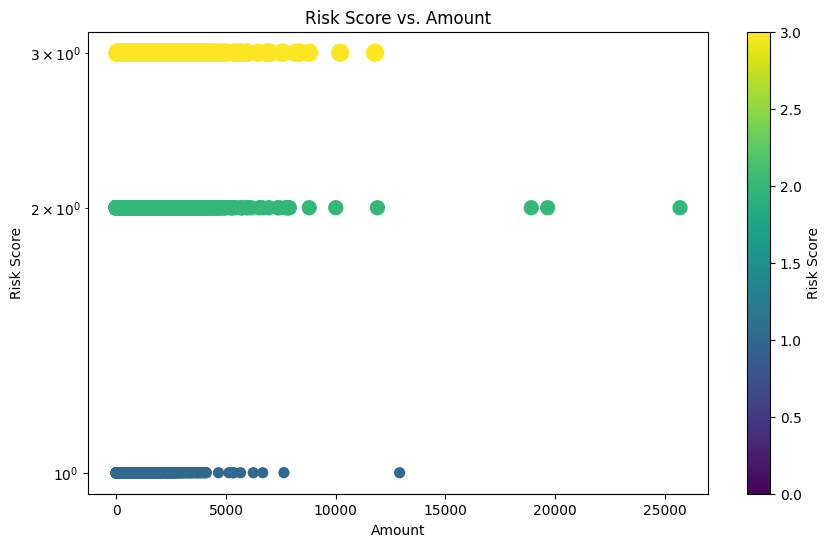

   Time_hours  Amount  Freq_per_hour  High_freq_hour  High_amount  \
0    0.000000  149.62              2           False         True   
1    0.000000    2.69              2           False        False   
2    0.000278  378.66              2           False         True   
3    0.000278  123.50              2           False         True   
4    0.000556   69.99              2           False        False   

   High_risk_time  Risk_score  
0            True           2  
1            True           1  
2            True           2  
3            True           2  
4            True           1  
0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64


In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('creditcard.csv')
df['Time_hours'] = df['Time'] / 3600
freq_per_hour = df.groupby('Time_hours').size().reset_index(name='Freq_per_hour')
median_freq = freq_per_hour['Freq_per_hour'].median()
df = df.merge(freq_per_hour, on='Time_hours', how='left')
df['High_freq_hour'] = df['Freq_per_hour'] > median_freq
amount_75th = df['Amount'].quantile(0.75)
df['High_amount'] = df['Amount'] > amount_75th
df['High_risk_time'] = (df['Time_hours'] >= 22) | (df['Time_hours'] < 6)
df['Risk_score'] = (df['High_freq_hour'].astype(int) + df['High_amount'].astype(int) + df['High_risk_time'].astype(int))
# Plot Risk_score vs. Time_hours
plt.figure(figsize=(10, 6))
plt.scatter(df['Time_hours'], df['Risk_score'], c=df['Risk_score'], s=df['Risk_score']*50, cmap='viridis')
plt.title('Risk Score vs. Time')
plt.xlabel('Time (Hours)')
plt.ylabel('Risk Score')
plt.colorbar(label='Risk Score')
plt.show()
# Plot Risk_score vs. Amount
plt.figure(figsize=(10, 6))
plt.scatter(df['Amount'], df['Risk_score'], c=df['Risk_score'], s=df['Risk_score']*50, cmap='viridis')
plt.yscale('log')
plt.title('Risk Score vs. Amount')
plt.xlabel('Amount')
plt.ylabel('Risk Score')
plt.colorbar(label='Risk Score')
plt.show()
X = df[['Time_hours', 'Amount', 'Freq_per_hour', 'High_freq_hour', 'High_amount', 'High_risk_time', 'Risk_score']]
y = df['Class']
print(X.head())
print(y.head())
# Comment: This code selects features (Time_hours, Amount, etc.) into X and target (Class) into y for modeling,
# and plots Risk_score against Time_hours and Amount with color gradient, log scale for Amount, and size by Risk_score.

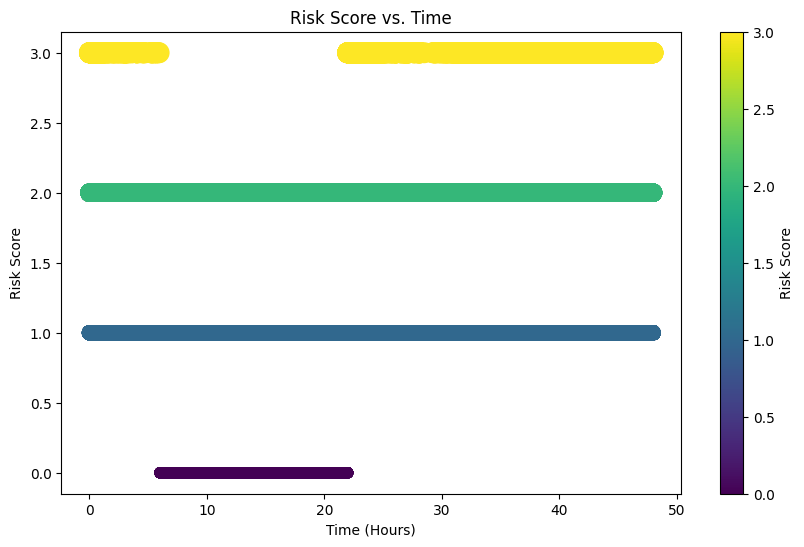

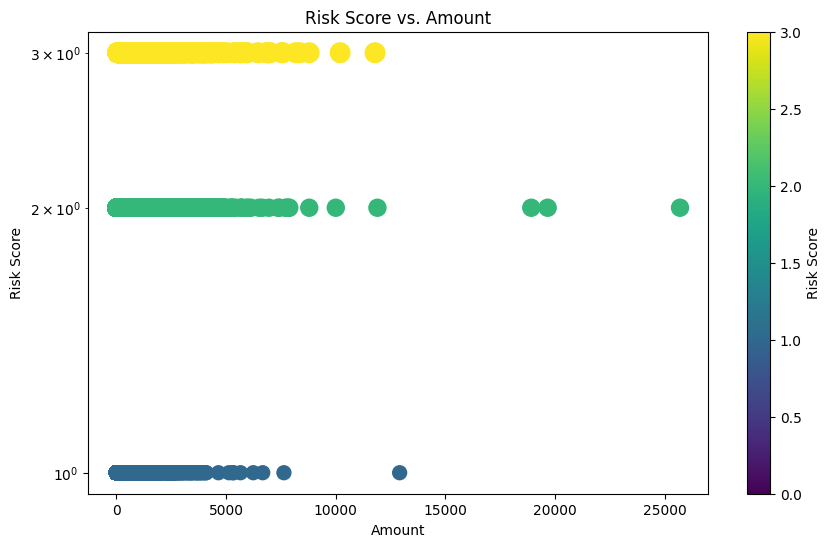

   Time_hours  Amount  Freq_per_hour  High_freq_hour  High_amount  \
0    0.000000  149.62              2           False         True   
1    0.000000    2.69              2           False        False   
2    0.000278  378.66              2           False         True   
3    0.000278  123.50              2           False         True   
4    0.000556   69.99              2           False        False   

   High_risk_time  Risk_score  
0            True           2  
1            True           1  
2            True           2  
3            True           2  
4            True           1  
0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64


In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('creditcard.csv')
df['Time_hours'] = df['Time'] / 3600
freq_per_hour = df.groupby('Time_hours').size().reset_index(name='Freq_per_hour')
median_freq = freq_per_hour['Freq_per_hour'].median()
df = df.merge(freq_per_hour, on='Time_hours', how='left')
df['High_freq_hour'] = df['Freq_per_hour'] > median_freq
amount_75th = df['Amount'].quantile(0.75)
df['High_amount'] = df['Amount'] > amount_75th
df['High_risk_time'] = (df['Time_hours'] >= 22) | (df['Time_hours'] < 6)
df['Risk_score'] = (df['High_freq_hour'].astype(int) + df['High_amount'].astype(int) + df['High_risk_time'].astype(int))
# Plot Risk_score vs. Time_hours
plt.figure(figsize=(10, 6))
plt.scatter(df['Time_hours'], df['Risk_score'], c=df['Risk_score'], s=(df['Risk_score']+1)*50, cmap='viridis')
plt.title('Risk Score vs. Time')
plt.xlabel('Time (Hours)')
plt.ylabel('Risk Score')
plt.colorbar(label='Risk Score')
plt.show()
# Plot Risk_score vs. Amount
plt.figure(figsize=(10, 6))
plt.scatter(df['Amount'], df['Risk_score'], c=df['Risk_score'], s=(df['Risk_score']+1)*50, cmap='viridis')
plt.yscale('log')
plt.title('Risk Score vs. Amount')
plt.xlabel('Amount')
plt.ylabel('Risk Score')
plt.colorbar(label='Risk Score')
plt.show()
X = df[['Time_hours', 'Amount', 'Freq_per_hour', 'High_freq_hour', 'High_amount', 'High_risk_time', 'Risk_score']]
y = df['Class']
print(X.head())
print(y.head())
# Comment: This code selects features (Time_hours, Amount, etc.) into X and target (Class) into y for modeling,
# and plots Risk_score against Time_hours and Amount with color gradient, log scale for Amount, and size by Risk_score+1 to show all scores.

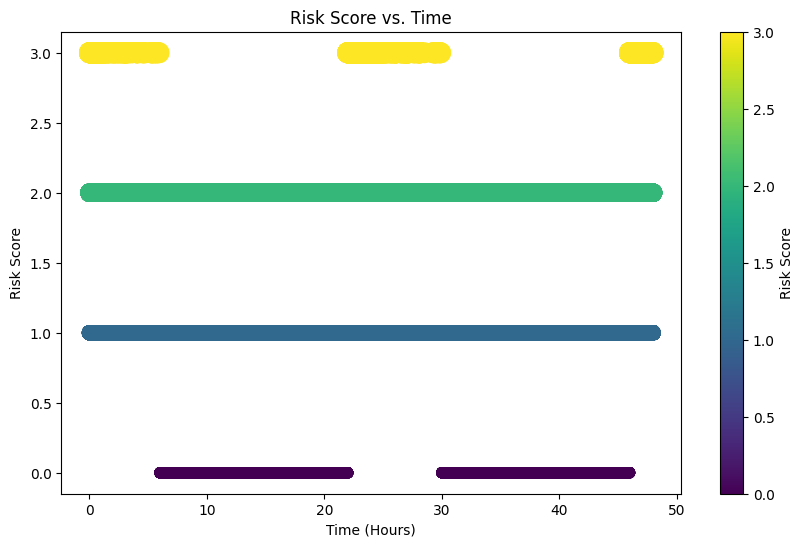

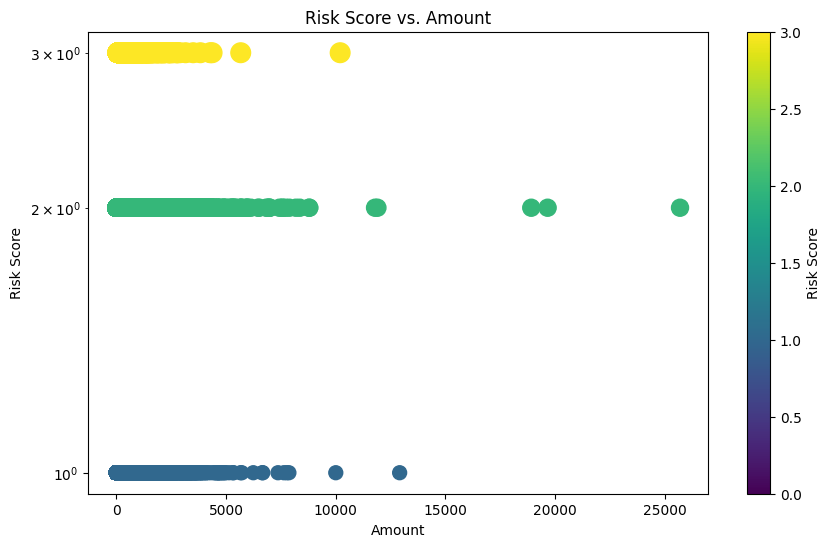

   Time_hours  Amount  Freq_per_hour  High_freq_hour  High_amount  \
0    0.000000  149.62              2           False         True   
1    0.000000    2.69              2           False        False   
2    0.000278  378.66              2           False         True   
3    0.000278  123.50              2           False         True   
4    0.000556   69.99              2           False        False   

   High_risk_time  Risk_score  
0            True           2  
1            True           1  
2            True           2  
3            True           2  
4            True           1  
0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64


In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('creditcard.csv')
df['Time_hours'] = df['Time'] / 3600
freq_per_hour = df.groupby('Time_hours').size().reset_index(name='Freq_per_hour')
median_freq = freq_per_hour['Freq_per_hour'].median()
df = df.merge(freq_per_hour, on='Time_hours', how='left')
df['High_freq_hour'] = df['Freq_per_hour'] > median_freq
amount_75th = df['Amount'].quantile(0.75)
df['High_amount'] = df['Amount'] > amount_75th
df['High_risk_time'] = ((df['Time_hours'] % 24 >= 22) | (df['Time_hours'] % 24 < 6))
df['Risk_score'] = (df['High_freq_hour'].astype(int) + df['High_amount'].astype(int) + df['High_risk_time'].astype(int))
# Plot Risk_score vs. Time_hours
plt.figure(figsize=(10, 6))
plt.scatter(df['Time_hours'], df['Risk_score'], c=df['Risk_score'], s=(df['Risk_score']+1)*50, cmap='viridis')
plt.title('Risk Score vs. Time')
plt.xlabel('Time (Hours)')
plt.ylabel('Risk Score')
plt.colorbar(label='Risk Score')
plt.show()
# Plot Risk_score vs. Amount
plt.figure(figsize=(10, 6))
plt.scatter(df['Amount'], df['Risk_score'], c=df['Risk_score'], s=(df['Risk_score']+1)*50, cmap='viridis')
plt.yscale('log')
plt.title('Risk Score vs. Amount')
plt.xlabel('Amount')
plt.ylabel('Risk Score')
plt.colorbar(label='Risk Score')
plt.show()
X = df[['Time_hours', 'Amount', 'Freq_per_hour', 'High_freq_hour', 'High_amount', 'High_risk_time', 'Risk_score']]
y = df['Class']
print(X.head())
print(y.head())
# Comment: This code selects features (Time_hours, Amount, etc.) into X and target (Class) into y for modeling,
# and plots Risk_score against Time_hours and Amount with color gradient, log scale for Amount, and size by Risk_score+1,
# adjusting High_risk_time with modulo 24 to reset night (22:00-06:00) per day.

In [127]:
df['Time_hours']

0          0.000000
1          0.000000
2          0.000278
3          0.000278
4          0.000556
            ...    
284802    47.996111
284803    47.996389
284804    47.996667
284805    47.996667
284806    47.997778
Name: Time_hours, Length: 284807, dtype: float64

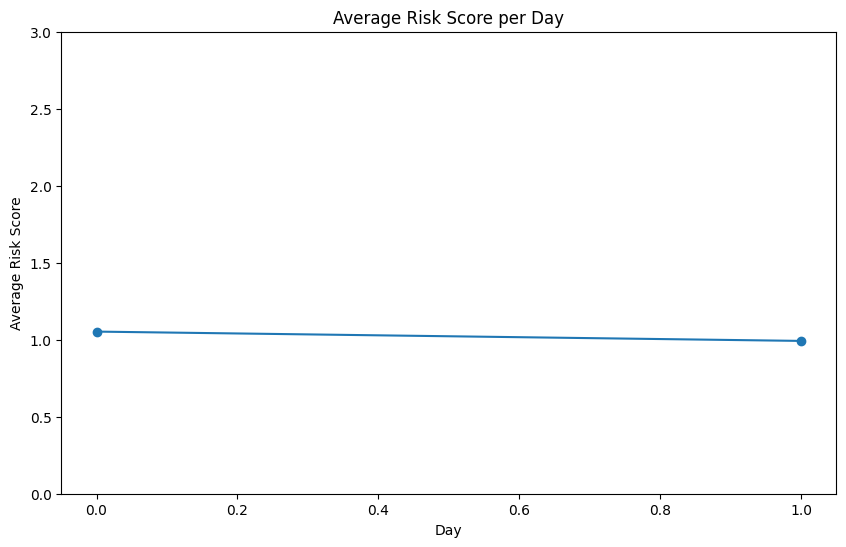

In [130]:

# Comment: This code groups Risk_score by day (Time_hours // 24) and plots the average per day for time series analysis.

df['Time_hours'] = df['Time'] / 3600
daily_risk = df.groupby(df['Time_hours'] // 24)['Risk_score'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(daily_risk['Time_hours'], daily_risk['Risk_score'], marker= 'o')
plt.ylim(0, 3)
plt.title('Average Risk Score per Day')
plt.xlabel('Day')
plt.ylabel('Average Risk Score')
plt.show()

In [129]:
daily_risk 

,Time_hours,Risk_score
0,0.0,1.052740
1,1.0,0.992273


In [131]:
df['Risk_score'] = (df['High_freq_hour'].astype(int) + df['High_amount'].astype(int) + df['High_risk_time'].astype(int))
print(df[['Time_hours', 'High_freq_hour', 'High_amount', 'High_risk_time', 'Risk_score']].head())
# Comment: This code creates a risk score (0-3) by summing binary flags for high frequency,
# high amount, and high-risk time periods.

   Time_hours  High_freq_hour  High_amount  High_risk_time  Risk_score
0    0.000000           False         True            True           2
1    0.000000           False        False            True           1
2    0.000278           False         True            True           2
3    0.000278           False         True            True           2
4    0.000556           False        False            True           1
